In [2]:
import sys
sys.path.append('../modules')
from sklearn.model_selection import train_test_split
import numpy as np

# Test lineaire 

Epoch 0, Loss: 328.49506263124226
Epoch 100, Loss: 1.1629263528233644
Epoch 200, Loss: 0.9792198770303073
Epoch 300, Loss: 0.9025660174624008
Epoch 400, Loss: 0.8705812212744032
Epoch 500, Loss: 0.8572351589501507
Epoch 600, Loss: 0.8516663449887953
Epoch 700, Loss: 0.8493426866555186
Epoch 800, Loss: 0.8483731107121886
Epoch 900, Loss: 0.8479685428390111
Test Loss: 0.6579924666759065


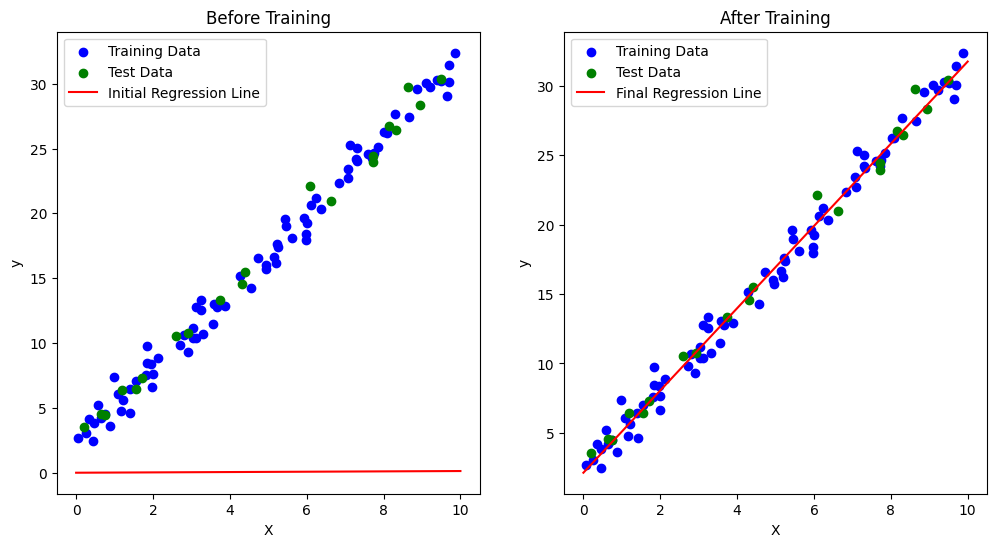

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from module import Module
from lineaire_1 import Linear, Initialization
from loss import MSELoss
from sklearn.model_selection import train_test_split

# Génération des données
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Génère 100 points aléatoires entre 0 et 10
y = 3 * X + 2 + np.random.randn(100, 1)  # y = 3x + 2 avec un peu de bruit

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle et la fonction de perte
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model = Linear(input=input_size, output=output_size, initialization=Initialization.LECUN)
loss_fn = MSELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-4

# Dessiner les données et la ligne de régression initiale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Ligne de régression initiale
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line_pred_initial = model.forward(X_line)
plt.plot(X_line, y_line_pred_initial, color='red', label='Initial Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Before Training')

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    y_pred = model.forward(X_train)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    model.backward_update_gradient(X_train, grad_loss)
    
    # Mise à jour des paramètres
    model.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
y_test_pred = model.forward(X_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Dessiner les données et la ligne de régression après l'entraînement
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Ligne de régression après l'entraînement
y_line_pred_final = model.forward(X_line)
plt.plot(X_line, y_line_pred_final, color='red', label='Final Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('After Training')

plt.show()


# test_non_lineaire 2

Epoch 0, Loss: 0.7364564973595303
Epoch 100, Loss: 0.6026556864531617
Epoch 200, Loss: 0.49012937412775753
Epoch 300, Loss: 0.38623221307680367
Epoch 400, Loss: 0.3061893448944867
Epoch 500, Loss: 0.25181021351179356
Epoch 600, Loss: 0.21570828603013234
Epoch 700, Loss: 0.1910846131788268
Epoch 800, Loss: 0.17356919081419778
Epoch 900, Loss: 0.16055052573524364
Test Loss: 0.2215155411088475


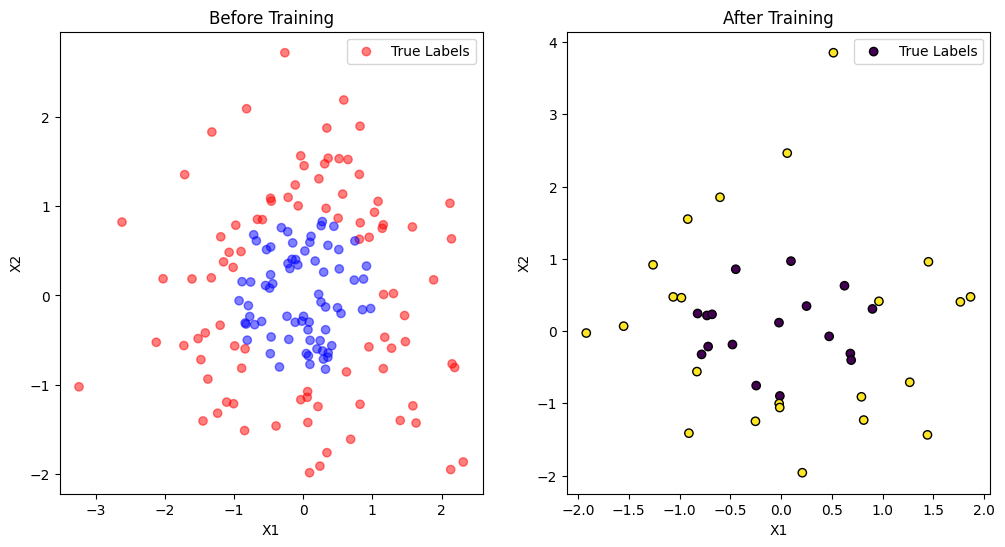

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from module import Module
from lineaire_1 import Linear, Initialization
from nonlineaire_2 import TanH, Sigmoid
from loss import BCELoss
from sklearn.model_selection import train_test_split

# Génération des données pour un problème de classification binaire
np.random.seed(42)
X = np.random.randn(200, 2)
y = (np.sum(X ** 2, axis=1) > 1).astype(int).reshape(-1, 1)  # Classe 1 si x1^2 + x2^2 > 1, sinon 0

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le réseau de neurones
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

layer1 = Linear(input=input_size, output=hidden_size, initialization=Initialization.LECUN)
activation1 = TanH()
layer2 = Linear(input=hidden_size, output=output_size, initialization=Initialization.LECUN)
activation2 = Sigmoid()

loss_fn = BCELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-3

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    X1 = layer1.forward(X_train)
    A1 = activation1.forward(X1)
    X2 = layer2.forward(A1)
    y_pred = activation2.forward(X2)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    grad_X2 = activation2.backward_delta(X2, grad_loss)
    layer2.backward_update_gradient(A1, grad_X2)
    grad_A1 = layer2.backward_delta(A1, grad_X2)
    grad_X1 = activation1.backward_delta(X1, grad_A1)
    layer1.backward_update_gradient(X_train, grad_X1)
    
    # Mise à jour des paramètres
    layer2.update_parameters(gradient_step=learning_rate)
    layer1.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
X1_test = layer1.forward(X_test)
A1_test = activation1.forward(X1_test)
X2_test = layer2.forward(A1_test)
y_test_pred = activation2.forward(X2_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Prédictions finales (seuil de 0.5 pour la classification binaire)
y_test_pred_classes = (y_test_pred >= 0.5).astype(int)

# Dessiner les données et les prédictions
plt.figure(figsize=(12, 6))

# Sous-graphe avant entraînement
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap='bwr', alpha=0.5, label='True Labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Before Training')
plt.legend()

# Sous-graphe après entraînement
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_classes.flatten(), cmap='bwr', alpha=0.5, label='Predictions')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), edgecolors='k', marker='o', facecolors='none', label='True Labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('After Training')
plt.legend()

plt.show()


Epoch 0, Loss: 0.7364564973595303
Epoch 100, Loss: 0.6026556864531617
Epoch 200, Loss: 0.49012937412775753
Epoch 300, Loss: 0.38623221307680367
Epoch 400, Loss: 0.3061893448944867
Epoch 500, Loss: 0.25181021351179356
Epoch 600, Loss: 0.21570828603013234
Epoch 700, Loss: 0.1910846131788268
Epoch 800, Loss: 0.17356919081419778
Epoch 900, Loss: 0.16055052573524364
Test Loss: 0.2215155411088475


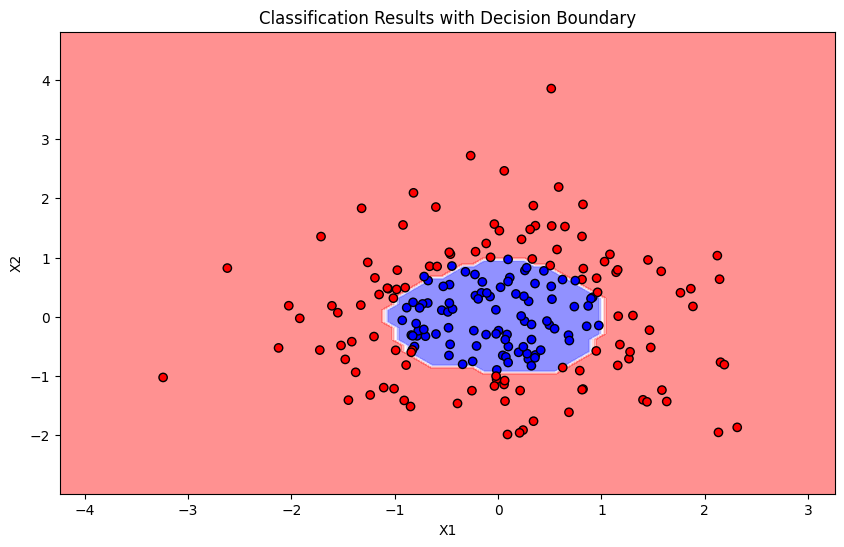

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from module import Module
from lineaire_1 import Linear, Initialization
from nonlineaire_2 import TanH, Sigmoid
from loss import BCELoss
from sklearn.model_selection import train_test_split

# Génération des données pour un problème de classification binaire
np.random.seed(42)
X = np.random.randn(200, 2)
y = (np.sum(X ** 2, axis=1) > 1).astype(int).reshape(-1, 1)  # Classe 1 si x1^2 + x2^2 > 1, sinon 0

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le réseau de neurones
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

layer1 = Linear(input=input_size, output=hidden_size, initialization=Initialization.LECUN)
activation1 = TanH()
layer2 = Linear(input=hidden_size, output=output_size, initialization=Initialization.LECUN)
activation2 = Sigmoid()

loss_fn = BCELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-3

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    X1 = layer1.forward(X_train)
    A1 = activation1.forward(X1)
    X2 = layer2.forward(A1)
    y_pred = activation2.forward(X2)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    grad_X2 = activation2.backward_delta(X2, grad_loss)
    layer2.backward_update_gradient(A1, grad_X2)
    grad_A1 = layer2.backward_delta(A1, grad_X2)
    grad_X1 = activation1.backward_delta(X1, grad_A1)
    layer1.backward_update_gradient(X_train, grad_X1)
    
    # Mise à jour des paramètres
    layer2.update_parameters(gradient_step=learning_rate)
    layer1.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
X1_test = layer1.forward(X_test)
A1_test = activation1.forward(X1_test)
X2_test = layer2.forward(A1_test)
y_test_pred = activation2.forward(X2_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Générer une grille de points couvrant la plage des données
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Prédictions sur la grille de points
X1_grid = layer1.forward(grid)
A1_grid = activation1.forward(X1_grid)
X2_grid = layer2.forward(A1_grid)
y_grid_pred = activation2.forward(X2_grid)
y_grid_pred_classes = (y_grid_pred >= 0.5).astype(int)

# Redimensionner les prédictions pour correspondre à la grille
zz = y_grid_pred_classes.reshape(xx.shape)

# Dessiner les données et la surface de décision
plt.figure(figsize=(10, 6))

# Surface de décision
plt.contourf(xx, yy, zz, alpha=0.5, cmap='bwr')

# Points de données
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='bwr')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Classification Results with Decision Boundary')
plt.show()


Epoch 0, Loss: 0.7364564973595303
Epoch 100, Loss: 0.6026556864531617
Epoch 200, Loss: 0.49012937412775753
Epoch 300, Loss: 0.38623221307680367
Epoch 400, Loss: 0.3061893448944867
Epoch 500, Loss: 0.25181021351179356
Epoch 600, Loss: 0.21570828603013234
Epoch 700, Loss: 0.1910846131788268
Epoch 800, Loss: 0.17356919081419778
Epoch 900, Loss: 0.16055052573524364
Test Loss: 0.2215155411088475


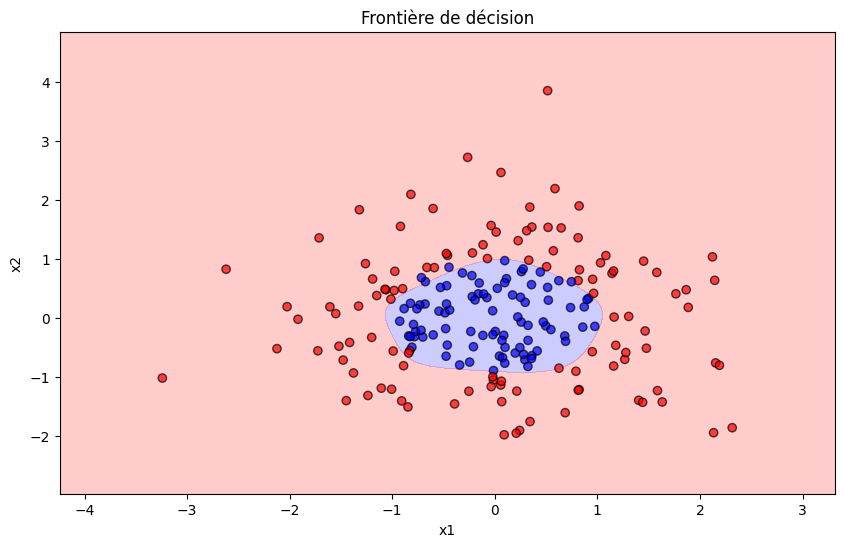

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from module import Module
from lineaire_1 import Linear, Initialization
from nonlineaire_2 import TanH, Sigmoid
from loss import BCELoss
from sklearn.model_selection import train_test_split

# Génération des données pour un problème de classification binaire
np.random.seed(42)
X = np.random.randn(200, 2)
y = (np.sum(X ** 2, axis=1) > 1).astype(int).reshape(-1, 1)  # Classe 1 si x1^2 + x2^2 > 1, sinon 0

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le réseau de neurones
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

layer1 = Linear(input=input_size, output=hidden_size, initialization=Initialization.LECUN)
activation1 = TanH()
layer2 = Linear(input=hidden_size, output=output_size, initialization=Initialization.LECUN)
activation2 = Sigmoid()

loss_fn = BCELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-3

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    X1 = layer1.forward(X_train)
    A1 = activation1.forward(X1)
    X2 = layer2.forward(A1)
    y_pred = activation2.forward(X2)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    grad_X2 = activation2.backward_delta(X2, grad_loss)
    layer2.backward_update_gradient(A1, grad_X2)
    grad_A1 = layer2.backward_delta(A1, grad_X2)
    grad_X1 = activation1.backward_delta(X1, grad_A1)
    layer1.backward_update_gradient(X_train, grad_X1)
    
    # Mise à jour des paramètres
    layer2.update_parameters(gradient_step=learning_rate)
    layer1.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
X1_test = layer1.forward(X_test)
A1_test = activation1.forward(X1_test)
X2_test = layer2.forward(A1_test)
y_test_pred = activation2.forward(X2_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Passe avant sur la grille de points
X1_grid = layer1.forward(grid)
A1_grid = activation1.forward(X1_grid)
X2_grid = layer2.forward(A1_grid)
y_grid_pred = activation2.forward(X2_grid)
y_grid_pred = y_grid_pred.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, y_grid_pred, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.bwr, alpha=0.7)
plt.title("Frontière de décision")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
